In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os
import scipy.stats as st
import numpy as np

df = pd.read_csv("merged_data.csv")
df

,Year,StateFIPS,CountyFIPS,Amount,Income,Rate,Income Ratio,LTV,Property Type,First,Race,Gender,Age,Credit Score
0,2009,21,117,148000,75322,0.0488,1.1378,0.80,PT01,2,5,1,36,5
1,2009,21,15,197500,141050,0.0475,2.1307,0.72,PT01,2,5,1,59,5
2,2009,21,117,219000,106017,0.0475,1.6015,0.70,PT01,2,5,2,27,5
3,2009,21,37,244000,125539,0.0500,1.8964,0.80,PT01,2,5,1,32,5
4,2009,21,15,417000,360272,0.0450,5.4422,0.35,PT01,2,5,1,46,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17162,2018,21,111,308000,185086,0.0463,2.5886,0.80,PT01,2,5,1,35,5
17163,2018,51,61,392000,146568,0.0475,1.2506,0.80,PT01,2,5,1,45,5
17164,2018,37,63,292000,107208,0.0463,1.3301,0.80,PT01,1,5,1,39,5
17165,2018,37,147,315200,104844,0.0488,1.7076,0.80,PT01,2,5,1,75,5


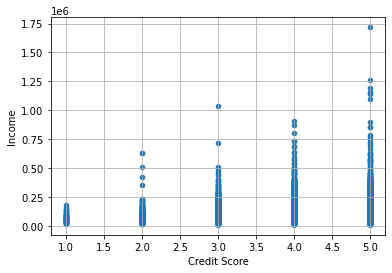

In [2]:
df.plot(kind="scatter", x="Credit Score", y="Income", grid=True)

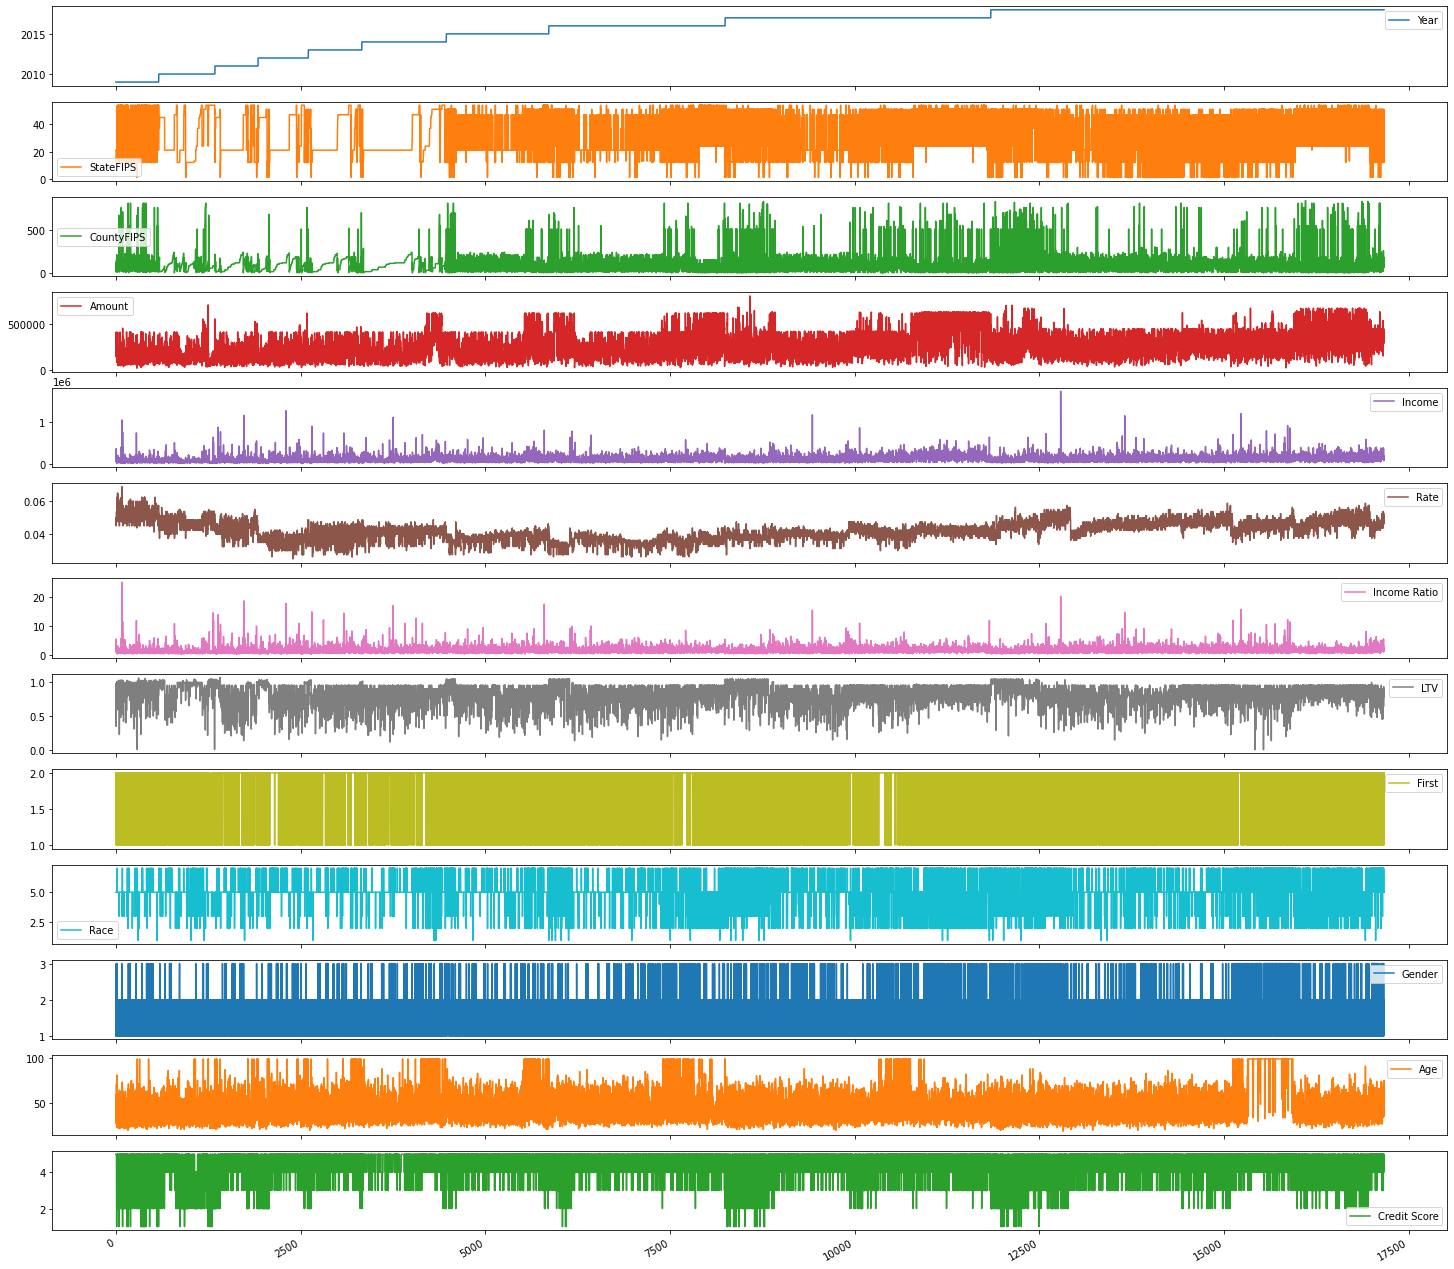

In [3]:
df.plot(subplots=True, figsize=(25, 25)); plt.legend(loc='best')

In [4]:
df.dtypes

Year               int64
StateFIPS          int64
CountyFIPS         int64
Amount             int64
Income             int64
Rate             float64
Income Ratio     float64
LTV              float64
Property Type     object
First              int64
Race               int64
Gender             int64
Age                int64
Credit Score       int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17167 entries, 0 to 17166
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           17167 non-null  int64  
 1   StateFIPS      17167 non-null  int64  
 2   CountyFIPS     17167 non-null  int64  
 3   Amount         17167 non-null  int64  
 4   Income         17167 non-null  int64  
 5   Rate           17167 non-null  float64
 6   Income Ratio   17167 non-null  float64
 7   LTV            17167 non-null  float64
 8   Property Type  17167 non-null  object 
 9   First          17167 non-null  int64  
 10  Race           17167 non-null  int64  
 11  Gender         17167 non-null  int64  
 12  Age            17167 non-null  int64  
 13  Credit Score   17167 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 1.8+ MB


In [6]:
df.describe()

,Year,StateFIPS,CountyFIPS,Amount,Income,Rate,Income Ratio,LTV,First,Race,Gender,Age,Credit Score
count,17167.000000,17167.000000,17167.000000,17167.000000,1.716700e+04,17167.000000,17167.000000,17167.000000,17167.000000,17167.000000,17167.000000,17167.000000,17167.000000
mean,2015.658123,29.705889,97.682705,258663.716200,1.147930e+05,0.041973,1.588984,0.816607,1.699074,4.928060,1.408982,45.279490,4.378284
std,2.606918,15.095864,103.466834,144901.100844,7.743448e+04,0.005524,1.083008,0.129799,0.458674,1.084084,0.616935,17.918607,0.834751
min,2009.000000,1.000000,1.000000,16500.000000,7.088000e+03,0.025000,0.141200,0.008000,1.000000,1.000000,1.000000,18.000000,1.000000
25%,2014.000000,21.000000,37.000000,144000.000000,6.390700e+04,0.037500,0.942700,0.800000,1.000000,5.000000,1.000000,32.000000,4.000000
50%,2017.000000,21.000000,81.000000,226121.000000,9.863000e+04,0.041300,1.369600,0.800000,2.000000,5.000000,1.000000,41.000000,5.000000
75%,2018.000000,47.000000,117.000000,349126.000000,1.445400e+05,0.046300,1.938700,0.900000,2.000000,5.000000,2.000000,53.000000,5.000000
max,2018.000000,54.000000,840.000000,814202.000000,1.718628e+06,0.068800,25.323800,1.064100,2.000000,7.000000,3.000000,99.000000,5.000000


In [13]:
#Filtering data 
credit_and_income = [['Credit Score', 'Income']]
df.set_index("Credit Score")

,Year,StateFIPS,CountyFIPS,Amount,Income,Rate,Income Ratio,LTV,Property Type,First,Race,Gender,Age
Credit Score,,,,,,,,,,,,,
5,2009,21,117,148000,75322,0.0488,1.1378,0.80,PT01,2,5,1,36
5,2009,21,15,197500,141050,0.0475,2.1307,0.72,PT01,2,5,1,59
5,2009,21,117,219000,106017,0.0475,1.6015,0.70,PT01,2,5,2,27
5,2009,21,37,244000,125539,0.0500,1.8964,0.80,PT01,2,5,1,32
5,2009,21,15,417000,360272,0.0450,5.4422,0.35,PT01,2,5,1,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2018,21,111,308000,185086,0.0463,2.5886,0.80,PT01,2,5,1,35
5,2018,51,61,392000,146568,0.0475,1.2506,0.80,PT01,2,5,1,45
5,2018,37,63,292000,107208,0.0463,1.3301,0.80,PT01,1,5,1,39


ValueError: invalid literal for int() with base 10: 'Credit Score'

In [ ]:
credit_count = df['Credit Score'].value_counts()
credit_count.plot(kind="bar", rot=1,title="Credit Scores vs Loan Count" )

In [ ]:
credit_count = df['Credit Score'].value_counts()
credit_count.plot(kind="line", title="Credit Scores vs Loan Count")